# 4. 数据计算与统计试题

4.1计算股票600104与600518的相关系数、spearman排序相关性与30天滚动的五日收益协方差

In [1]:
import pandas as pd
stock1 = pd.read_excel('sz50.xlsx',sheetname='600104.XSHG', index_col='datetime')
stock2 = pd.read_excel('sz50.xlsx',sheetname='600518.XSHG', index_col='datetime')
five_day_df = pd.concat([stock1.close.pct_change(5),stock2.close.pct_change(5)],keys=['stock1','stock2'],axis=1)

In [2]:
# 相关系数
correlation = five_day_df.corr()
print(correlation)

          stock1    stock2
stock1  1.000000  0.348809
stock2  0.348809  1.000000


In [3]:
# spearman排序相关性
spearman = five_day_df.corr(method='spearman')
print(spearman)

         stock1   stock2
stock1  1.00000  0.38035
stock2  0.38035  1.00000


In [4]:
# 30天滚动的五日收益协方差
cov_30 = five_day_df.rolling(30).cov()
print(cov_30.tail(6))

                              stock1    stock2
datetime                                      
2017-11-16 15:00:00 stock1  0.001200  0.000289
                    stock2  0.000289  0.000682
2017-11-17 15:00:00 stock1  0.001196  0.000291
                    stock2  0.000291  0.000710
2017-11-20 15:00:00 stock1  0.001192  0.000318
                    stock2  0.000318  0.000696


4.2
读取600104.XSHG的股票日线

利用正确的方法将日K线聚合成周K线

将周K线画出来

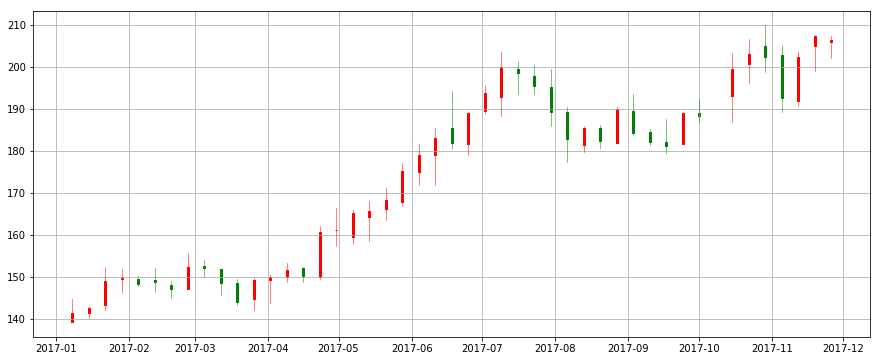

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import date2num
import mpl_finance as mpf

stock = pd.read_excel('sz50.xlsx', sheetname='600104.XSHG', index_col='datetime')
stockW = stock.resample('W').agg({'high':'max', 'low':'min', 'open':'first', 'close':'last'})

stockW['time'] = list(map(date2num, stockW.index))

Candle = stockW[['time', 'open', 'high', 'low', 'close']].values

fig, ax = plt.subplots(1,1,figsize=(15, 6))
ax.grid(True)  # 加网格
mpf.candlestick_ohlc(ax, Candle, width=0.8, colorup='r', colordown='g',alpha=1.0)

ax.xaxis_date()  # 时间转换

plt.show()

4.3 读取股票601857数据，计算股票回报率，判断样本在2017-01-01,到2017-12-31，有没有服从正态分布，并判断样本均值是否为0

In [6]:
import tushare as ts
import pandas as pd
from statsmodels.stats.stattools import jarque_bera
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
data = ts.get_k_data('601857', start='2017-01-01', end='2017-12-31', ktype='D',autype='qfq')
data.index = pd.to_datetime(data['date'],format='%Y-%m-%d')
data['percentage']=data['close'].pct_change()
returns = data['percentage'][1:]
_, pvalue, _, _ = jarque_bera(returns)
if pvalue > 0.05:
    print ('判断样本分布服从正态分布')
else:
    print ('判断样本分布不服从正态分布')


判断样本分布不服从正态分布


In [7]:
t_test = stats.ttest_1samp(returns, 0)
if t_test.pvalue > 0.05:
    print ('判断样本均值为0')
else:
    print ('判断样本均值不为0')

判断样本均值为0


4.4 用Pandas的递归函数计算EMA与DEMA，对比talib的EMA与DEMA
1. 根据以上的算法，利用Pandas的ewm方法计算601901.XSHG以10天为周期的EMA，再算出DEMA。
2. 用talib计算601901.XSHG以10天为周期的EMA，再算出DEMA。
3. 打印两个结果的最后5个数据

In [8]:
import talib as ta
from talib import abstract
import pandas as pd

data = pd.read_excel('sz50.xlsx', sheetname='601901.XSHG', index_col='datetime')

In [9]:
EMA = data.ewm(span=10).mean().close
DEMA = 2 * EMA - EMA.ewm(span=10).mean()
print(EMA.tail())
print(DEMA.tail())

datetime
2017-11-14 15:00:00    8.556962
2017-11-15 15:00:00    8.544787
2017-11-16 15:00:00    8.496644
2017-11-17 15:00:00    8.426345
2017-11-20 15:00:00    8.388828
Name: close, dtype: float64
datetime
2017-11-14 15:00:00    8.602581
2017-11-15 15:00:00    8.572151
2017-11-16 15:00:00    8.479642
2017-11-17 15:00:00    8.354917
2017-11-20 15:00:00    8.299691
Name: close, dtype: float64


In [10]:
print(abstract.EMA(data, 10).tail())
print(abstract.DEMA(data, 10).tail())

datetime
2017-11-14 15:00:00    8.556962
2017-11-15 15:00:00    8.544787
2017-11-16 15:00:00    8.496644
2017-11-17 15:00:00    8.426345
2017-11-20 15:00:00    8.388828
dtype: float64
datetime
2017-11-14 15:00:00    8.602581
2017-11-15 15:00:00    8.572151
2017-11-16 15:00:00    8.479642
2017-11-17 15:00:00    8.354917
2017-11-20 15:00:00    8.299691
dtype: float64


# 5.分析工具

数据时间：  'start_date': 20140101, 'end_date': 20180101, '

5.1 用alphalens分析沪深300成分股里float_mv因子在5日、30日、60日持有期下的因子表现。 （要求：按上证交易所上市、深证交易所上市分组，绘制ic柱状图比较不同组在不同持有期下的ic差异）-最后结果输出类似下面的表和图。

In [11]:
from jaqs.data import DataView
import warnings
warnings.filterwarnings("ignore")
dataview_folder = './Factor'
dv = DataView()
dv.load_dataview(dataview_folder)

Dataview loaded successfully.


In [12]:
import pandas as pd
from datetime import datetime

factor = dv.get_ts("float_mv")
factor.index = pd.Index(map(lambda x: datetime.strptime(str(x),"%Y%m%d") , factor.index)) #索引调整为datetime日期格式
factor = factor.stack()#处理成MultiIndex格式（alphalens分析因子必须的格式）

def change_index(df):
    df.index = pd.Index(map(lambda x: datetime.strptime(str(x),"%Y%m%d") , df.index)) #索引调整为datetime日期格式 
    return df

def grouping(df):
    for x in df.columns:
        if x[-2:] == 'SZ':
            df[x] = 'SZ'
        if x[-2:] == 'SH':
            df[x] = 'SH'
    return df

dv.add_formula("groups", "grouping(close_adj)",
               is_quarterly=False,
               add_data=True,
               register_funcs={"grouping":grouping})

sectors = dv.get_ts("groups")
sectors = change_index(sectors)

prices = dv.get_ts("close_adj")
prices = change_index(prices)

In [13]:
import alphalens

factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor,
                                                                   prices,
                                                                   groupby=sectors.stack(),
                                                                   quantiles=5,
                                                                   periods=(5, 30, 60))
factor_data.head()


Dropped 6.4% entries from factor data: 6.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


5D       30D       60D        factor group  \
date       asset                                                         
2014-01-02 000001.SZ -0.033524 -0.038430 -0.119379  6.819328e+06    SZ   
           000002.SZ -0.066333 -0.083855  0.013767  7.730278e+06    SZ   
           000008.SZ -0.102222  0.036667  0.080000  1.325756e+05    SZ   
           000009.SZ -0.075532  0.164894  0.138298  1.166907e+06    SZ   
           000012.SZ -0.093252 -0.002454 -0.030675  1.062468e+06    SZ   

                      factor_quantile  
date       asset                       
2014-01-02 000001.SZ                5  
           000002.SZ                5  
           000008.SZ                1  
           000009.SZ                3  
           000012.SZ                2

In [14]:
ic_by_sector = alphalens.performance.mean_information_coefficient(factor_data, by_group=True)
ic_by_sector.head()


,5D,30D,60D
group,,,
SH,-0.019890,-0.011939,0.004947
SZ,-0.031756,-0.049609,-0.058176


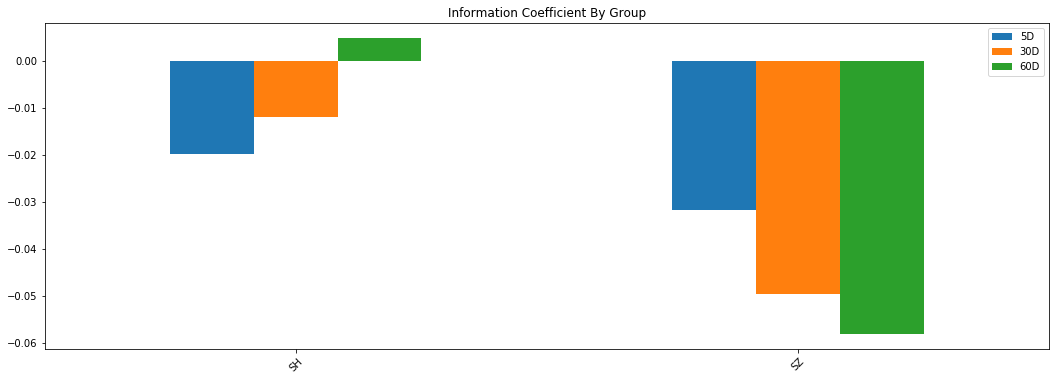

In [15]:
from matplotlib import pyplot as plt
alphalens.plotting.plot_ic_by_group(ic_by_sector)
plt.show()

5.2（大致输出结果有下图）

5.2.1可视化比较CCI、Divert（习题定义）、pb的10日变化率、vwap_adj的10日变化率 这4个因子在5日、30日、60日持有期下的平均IC和IC_IR

5.2.2挑选上题中5日IC_IR最大的3个因子进行因子组合（注意需对因子进行去极值和z-score标准化处理，最终的组合因子也需要进行z-score标准化处理），并用柱状图比较各组合方法生成的因子与原因子在5日持有期下的IC和IC_IR；调用指标分析和可视化分析的方法，查看ic_weight方法合成的因子绩效，保存该合成方法下绩效最好quantile的选股结果

In [16]:
dv.add_formula("Divert", "Correlation(close_adj,volume, 20)", is_quarterly=False, add_data=True)

dv.add_formula("pb_change", "Return(pb,10)", is_quarterly=False, add_data=True)

dv.add_formula("vwap_change", "Return(vwap_adj,10)", is_quarterly=False, add_data=True)

from jaqs.research.signaldigger import process
Open = dv.get_ts("open_adj")
High = dv.get_ts("high_adj")
Low = dv.get_ts("low_adj")
Close = dv.get_ts("close_adj")
trade_status = dv.get_ts('trade_status')
mask_sus = trade_status == 0

# 剔除掉停牌期的数据　再计算指标
open_masked = process._mask_df(Open,mask=mask_sus)
high_masked = process._mask_df(High,mask=mask_sus)
low_masked = process._mask_df(Low,mask=mask_sus)
close_masked = process._mask_df(Close,mask=mask_sus)

from jaqs.data import signal_function_mod as sfm
CCI = sfm.ta(ta_method='CCI',
             ta_column=0, 
             Open=open_masked, 
             High=high_masked, 
             Low=low_masked, 
             Close=close_masked,
             Volume=None,
             timeperiod=14
             )

dv.append_df(CCI,'CCI')

数据缺失严重,无法完成指标计算,请检查是否存在数据问题.


In [17]:
import numpy as np
def mask_index_member():
    df_index_member = dv.get_ts('index_member')
    mask_index_member = ~(df_index_member >0) #定义信号过滤条件-非指数成分
    return mask_index_member
def limit_up_down():
    # 定义可买卖条件——未停牌、未涨跌停
    trade_status = dv.get_ts('trade_status')
    mask_sus = trade_status == 0
    # 涨停
    dv.add_formula('up_limit', '(close - Delay(close, 1)) / Delay(close, 1) > 0.095', is_quarterly=False, add_data=True)
    # 跌停
    dv.add_formula('down_limit', '(close - Delay(close, 1)) / Delay(close, 1) < -0.095', is_quarterly=False, add_data=True)
    can_enter = np.logical_and(dv.get_ts('up_limit') < 1, ~mask_sus) # 未涨停未停牌
    can_exit = np.logical_and(dv.get_ts('down_limit') < 1, ~mask_sus) # 未跌停未停牌
    return can_enter,can_exit
mask = mask_index_member()
can_enter,can_exit = limit_up_down()

from jaqs.research.signaldigger import multi_factor
ic = dict()
factors_dict = {signal:dv.get_ts(signal) for signal in ["CCI","Divert","pb_change","vwap_change"]}
for period in [5, 30, 60]:
    ic[period]=multi_factor.get_factors_ic_df(factors_dict,
                                              price=dv.get_ts("close_adj"),
                                              high=dv.get_ts("high_adj"), # 可为空
                                              low=dv.get_ts("low_adj"),# 可为空
                                              n_quantiles=5,# quantile分类数
                                              mask=mask,# 过滤条件
                                              can_enter=can_enter,# 是否能进场
                                              can_exit=can_exit,# 是否能出场
                                              period=period,# 持有期
                                              benchmark_price=dv.data_benchmark, # 基准价格 可不传入，持有期收益（return）计算为绝对收益
                                              commission = 0.0008,
                                              )

Nan Data Count (should be zero) : 0;  Percentage of effective data: 60%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 60%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 61%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 60%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 60%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 61%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 60%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 60%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 61%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%


In [18]:
import pandas as pd
ic_mean_table = pd.DataFrame(data=np.nan,columns=[5,30,60],index=["CCI","Divert","pb_change","vwap_change"])
ic_std_table = pd.DataFrame(data=np.nan,columns=[5,30,60],index=["CCI","Divert","pb_change","vwap_change"])
ir_table = pd.DataFrame(data=np.nan,columns=[5,30,60],index=["CCI","Divert","pb_change","vwap_change"])
for signal in ["CCI","Divert","pb_change","vwap_change"]:
    for period in [5, 30, 60]:
        ic_mean_table.loc[signal,period]=ic[period][signal].mean()
        ic_std_table.loc[signal,period]=ic[period][signal].std()
        ir_table.loc[signal,period]=ic[period][signal].mean()/ic[period][signal].std()
# print(ic_mean_table)
# print(ic_std_table)
# print(ir_table)

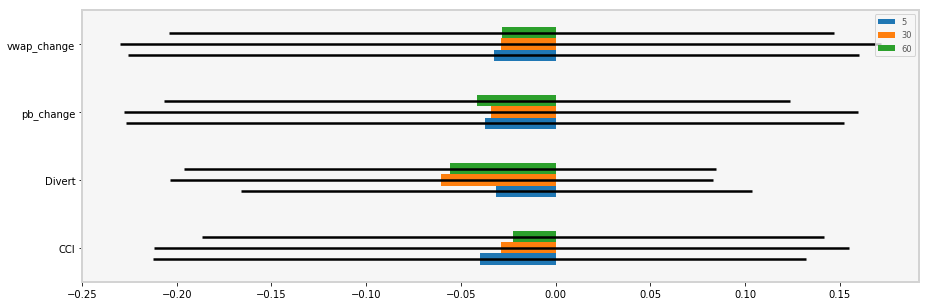

In [19]:
%matplotlib inline
ic_mean_table.plot(kind="barh",xerr=ic_std_table,figsize=(15,5))

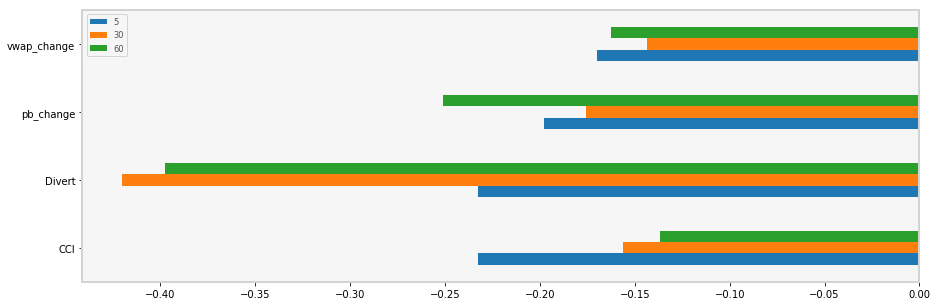

In [20]:
%matplotlib inline
ir_table.plot(kind="barh",figsize=(15,5))

### 比较组合前和组合后的因子在5日持有期下的表现（统一到2014年9月后进行比较）

In [22]:
from jaqs.research.signaldigger import process
factor_dict = dict()
index_member = dv.get_ts("index_member")
for name in ["CCI","Divert","pb_change"]:
    signal = -1*dv.get_ts(name) # 调整符号
    process.winsorize(factor_df=signal,alpha=0.05,index_member=index_member)#去极值
    signal = process.standardize(signal,index_member) #z-score标准化 保留排序信息和分布信息
    factor_dict[name] = signal

    
props = {
    'price':dv.get_ts("close_adj"),
    'high':dv.get_ts("high_adj"), # 可为空
    'low':dv.get_ts("low_adj"),# 可为空
    'ret_type': 'return',#可选参数还有upside_ret/downside_ret 则组合因子将以优化潜在上行、下行空间为目标
    'benchmark_price': dv.data_benchmark,  # 为空计算的是绝对收益　不为空计算相对收益
    'period': 5, # 5天的持有期
    'mask': mask,
    'can_enter': can_enter,
    'can_exit': can_exit,
    'forward': True,
    'commission': 0.0008,
    "covariance_type": "shrink",  # 协方差矩阵估算方法 还可以为"simple"
    "rollback_period": 120}  # 滚动窗口天数

comb_factors = dict()
for method in ["equal_weight","ic_weight","ir_weight","max_IR","max_IC"]:
    comb_factors[method] = multi_factor.combine_factors(factor_dict,
                                                        standardize_type="rank",
                                                        winsorization=False,
                                                        weighted_method=method,
                                                        props=props)
#     print(method)
#     print(comb_factors[method].dropna(how="all").head())

Nan Data Count (should be zero) : 0;  Percentage of effective data: 60%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 60%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 61%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 60%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 60%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 61%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 60%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 60%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 61%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 60%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 60%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 61%


In [24]:
period = 5
ic_5  =   multi_factor.get_factors_ic_df(comb_factors,
                                          price=dv.get_ts("close_adj"),
                                          high=dv.get_ts("high_adj"), # 可为空
                                          low=dv.get_ts("low_adj"),# 可为空
                                          n_quantiles=5,# quantile分类数
                                          mask=mask,# 过滤条件
                                          can_enter=can_enter,# 是否能进场
                                          can_exit=can_exit,# 是否能出场
                                          period=period,# 持有期
                                          benchmark_price=dv.data_benchmark, # 基准价格 可不传入，持有期收益（return）计算为绝对收益
                                          commission = 0.0008,
                                          )
ic_5 = pd.concat([ic_5,-1*ic[5].drop("vwap_change",axis=1)],axis=1)
ic_5.head()

Nan Data Count (should be zero) : 0;  Percentage of effective data: 59%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 52%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 52%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 51%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%


,equal_weight,ic_weight,ir_weight,max_IR,max_IC,CCI,Divert,pb_change
trade_date,,,,,,,,
20140102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20140103,NaN,NaN,NaN,NaN,NaN,NaN,0.024367,-0.189880
20140106,NaN,NaN,NaN,NaN,NaN,NaN,0.064487,-0.023115
20140107,NaN,NaN,NaN,NaN,NaN,NaN,0.075146,0.042528
20140108,NaN,NaN,NaN,NaN,NaN,NaN,0.076840,0.109114


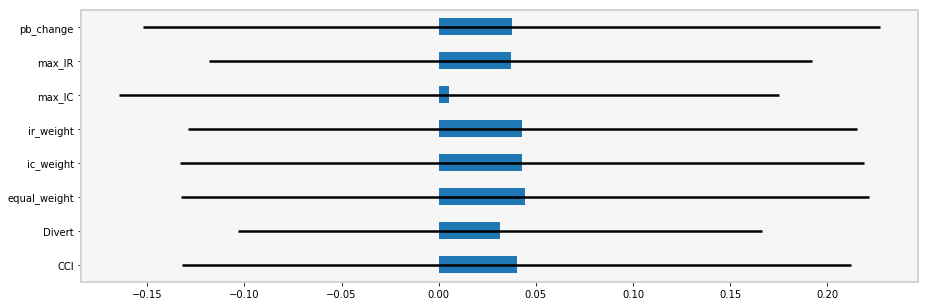

In [25]:
ic_5_mean = dict()
ic_5_std = dict()
ir_5 = dict()
for name in ic_5.columns:    
    ic_5_mean[name]=ic_5[name].mean()
    ic_5_std[name]=ic_5[name].std()
    ir_5[name] = ic_5_mean[name]/ic_5_std[name]
    
import datetime

trade_date = pd.Series(ic_5.index)
trade_date = trade_date.apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d'))
ic_5.index = trade_date

pd.Series(ic_5_mean).plot(kind="barh",xerr=pd.Series(ic_5_std),figsize=(15,5))

In [26]:
print(ic_5_mean["ir_weight"])
print(ic_5_mean["ic_weight"])
print(ic_5_mean["equal_weight"])

0.0430376096107473
0.042772798888111474
0.0444910011923091


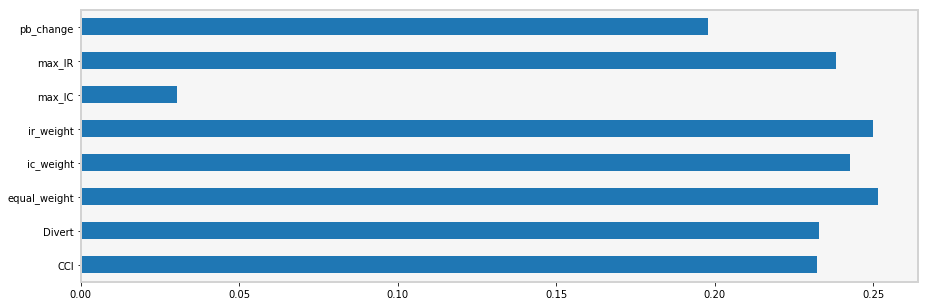

In [27]:
pd.Series(ir_5).plot(kind="barh",figsize=(15,5))

In [28]:
print(ir_5["equal_weight"])
print(ir_5["ic_weight"])
print(ir_5["ir_weight"])

0.251512020111505
0.24280870439229793
0.24980715526777353


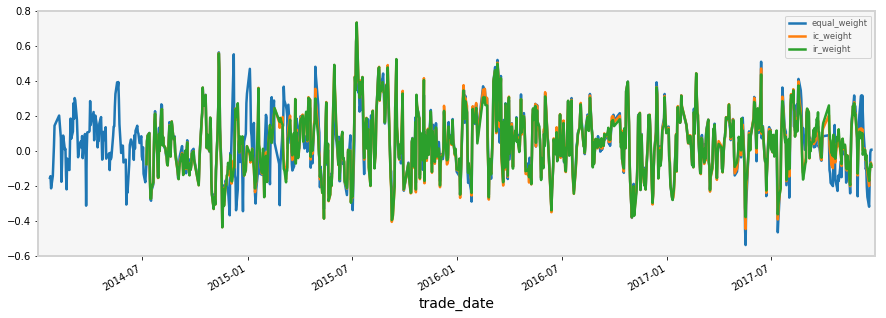

In [29]:
ic_5[["equal_weight","ic_weight","ir_weight"]].plot(kind="line",figsize=(15,5),)

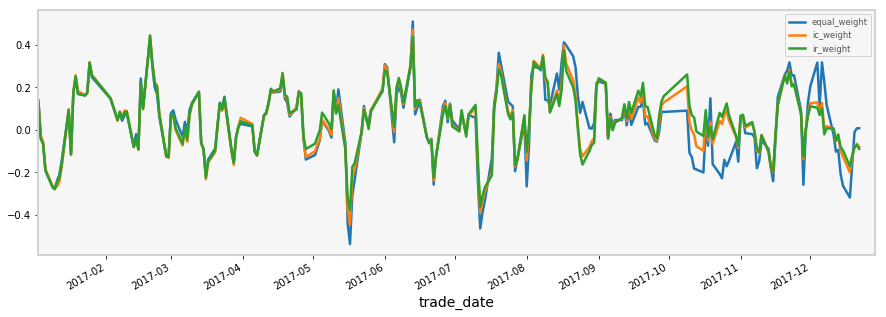

In [30]:
ic_5.loc[datetime.date(2017,1,3):,][["equal_weight","ic_weight","ir_weight"]].plot(kind="line",figsize=(15,5),)


5.3. 优化动量因子momentum：vwap_adj的n日变化率中的参数n（2<=n<=10）。优化目标是10日持有期的IC的IR。（要求：进行样本内优化，优化所用数据时段20140101~20170101，查看样本外20170101~表现，大致输出以下结果）

In [32]:
from jaqs.research import Optimizer

price = dv.get_ts('close_adj')
high = dv.get_ts('high_adj')
low = dv.get_ts('low_adj')
price_bench = dv.data_benchmark
optimizer = Optimizer(dataview=dv,
                      formula='- Return(vwap_adj, LEN)',
                      params={"LEN":range(2,11,1)},
                      name='momentum',
                      price=price,
                      high=high,
                      low=low,
                      benchmark_price=None,#=None求绝对收益 #=price_bench求相对收益
                      period=30,
                      n_quantiles=5,
                      mask=mask,
                      can_enter=can_enter,
                      can_exit=can_exit,
                      commission=0.0008,#手续费 默认0.0008
                      is_event=False,#是否是事件(0/1因子)
                      is_quarterly=False)#是否是季度因子 默认为False

# 以持有期IC_IR为最优化目标
ic_best = optimizer.enumerate_optimizer(target_type="return_ic",#优化目标类型
                                        target = "Ann. IR",
                                        in_sample_range=[20140101,20170101],#样本内范围 默认为None,在全样本上优化
                                        ascending=False)  

Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%


In [33]:
print(ic_best[0]["signal_name"])
print(ic_best[0]["ic"])
print(ic_best[0]["ret"])
print(ic_best[0]["space"])

momentum{'LEN': 10}
                return_ic  upside_ret_ic  downside_ret_ic
IC Mean      5.388090e-02      -0.008689     3.821654e-02
IC Std.      2.010690e-01       0.206101     1.695875e-01
t-stat(IC)   7.250121e+00      -1.140620     6.096958e+00
p-value(IC)  1.062115e-12       0.254402     1.749982e-09
IC Skew      6.710039e-02       0.089301    -2.753009e-01
IC Kurtosis  5.518633e-01       0.258744     4.254961e-01
Ann. IR      2.679722e-01      -0.042159     2.253501e-01
             long_ret   short_ret  long_short_ret  top_quantile_ret  \
t-stat       7.109827   -2.354143        1.182058         36.068514   
p-value      0.000000    0.018830        0.237570          0.000000   
skewness     0.227972   -0.076194       -0.111661          1.069036   
kurtosis     0.318854    0.838967        2.300479          5.231143   
Ann. Ret     0.243560   -0.094166        0.027448          0.242308   
Ann. Vol     0.326106    0.380258        0.221046          0.476590   
Ann. IR      0.7468

样本外可视化



Value of signals of Different Quantiles Statistics
               min       max      mean       std  count    count %
quantile                                                          
1        -0.864543  0.007599 -0.076272  0.050855  13919  20.141813
2        -0.084323  0.037221 -0.020625  0.018537  13818  19.995659
3        -0.050000  0.065212  0.002443  0.018663  13823  20.002894
4        -0.038858  0.102642  0.023246  0.022582  13818  19.995659
5        -0.019724  1.000000  0.111672  0.216533  13727  19.863975
Figure saved: C:\Users\admin\Desktop\dayu\returns_report.pdf
Information Analysis
                ic
IC Mean     -0.057
IC Std.      0.175
t-stat(IC)  -4.735
p-value(IC)  0.000
IC Skew     -0.148
IC Kurtosis -0.789
Ann. IR     -0.324
Figure saved: C:\Users\admin\Desktop\dayu\information_report.pdf


<Figure size 432x288 with 0 Axes>

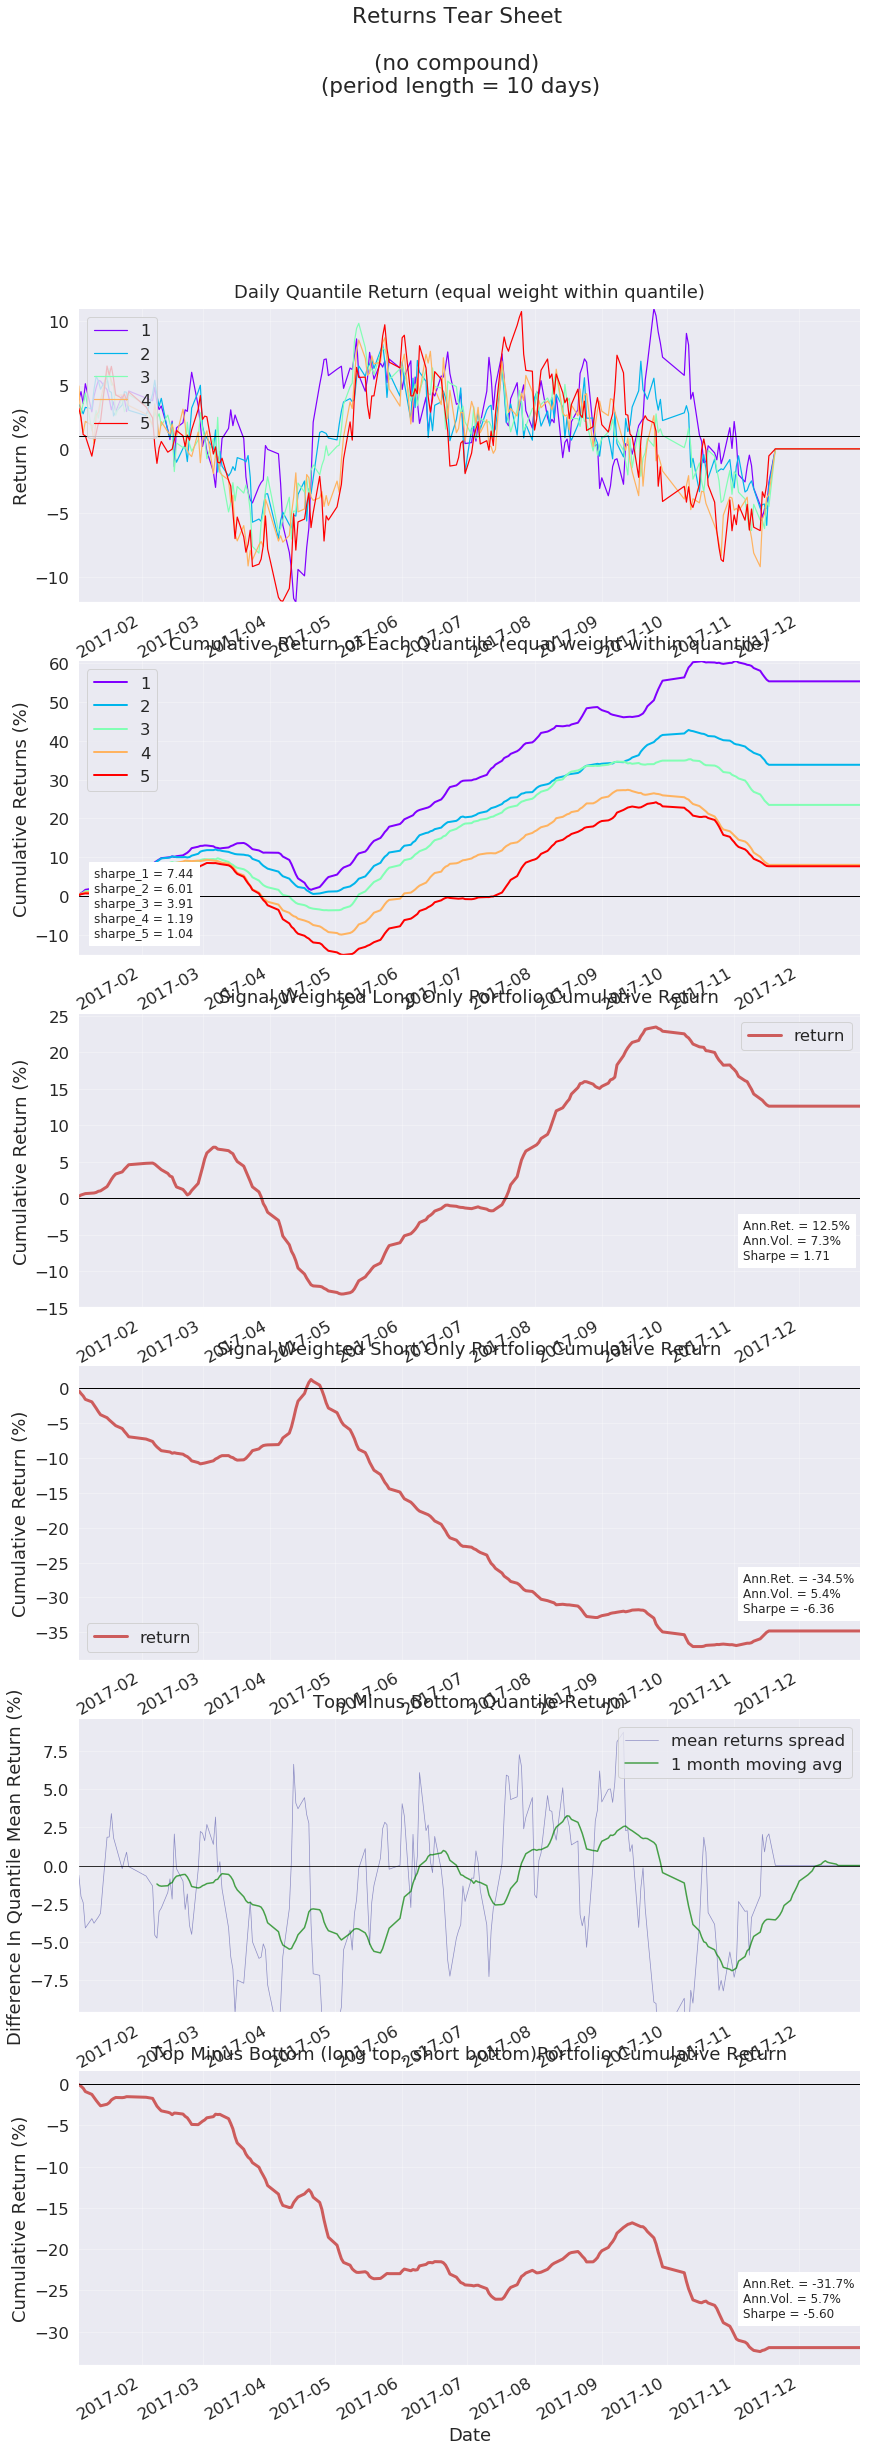

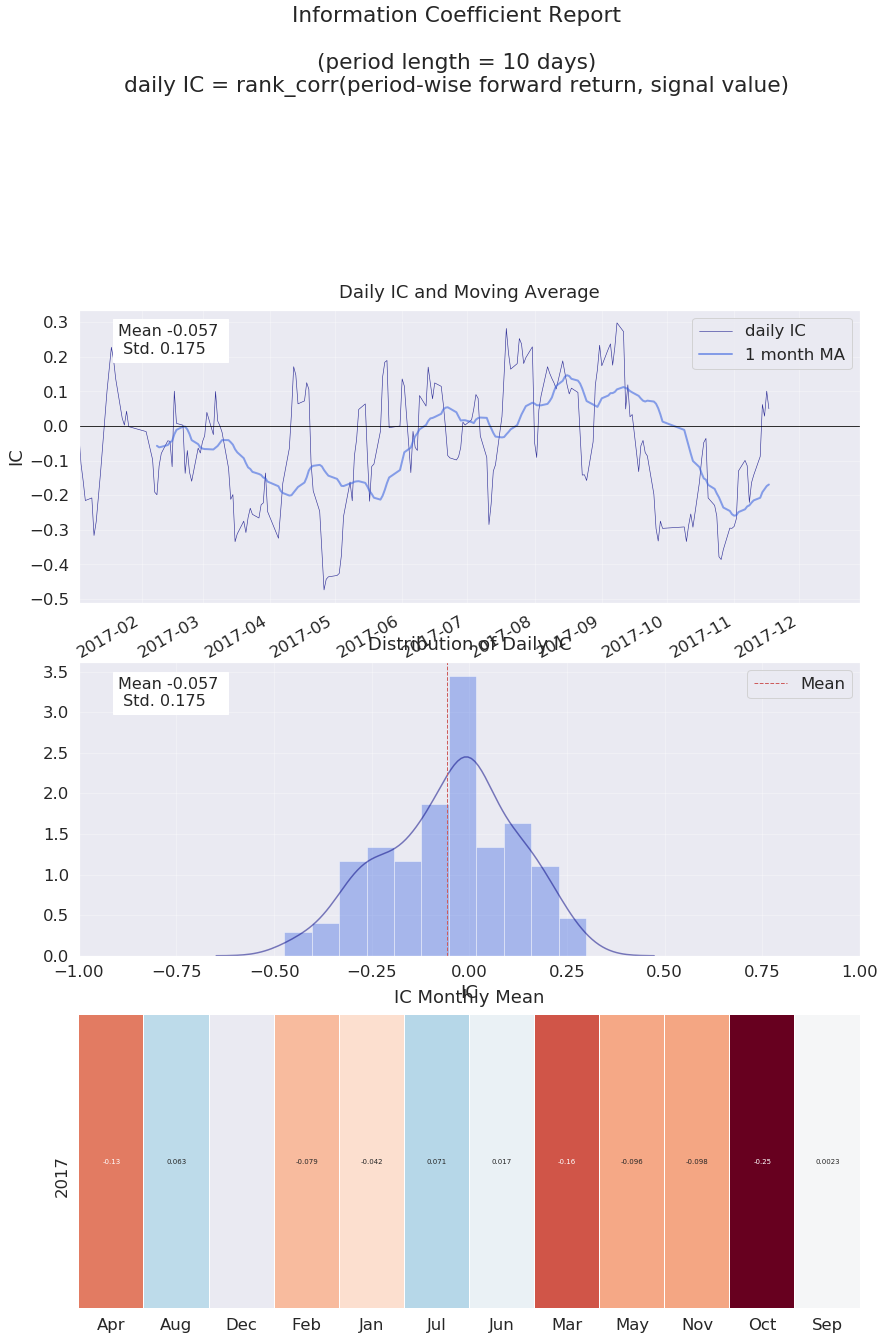

In [34]:
from jaqs.research import SignalDigger
from jaqs.research.signaldigger.analysis import analysis
import matplotlib.pyplot as plt
obj = SignalDigger()
def draw_analysis(signal_data,period):  
    obj.signal_data = signal_data
    obj.period = period
    obj.create_full_report()
    plt.show()
draw_analysis(optimizer.all_signals[ic_best[0]["signal_name"]].loc[20170101:], period=10)